In [1]:
import pandas as pd
import time
import requests
import numpy as np

In [2]:
Base_url="https://fbref.com/en/comps/9/2023-2024/stats/2023-2024-Premier-League-Stats"

In [3]:
season_data=pd.DataFrame()

**Data Extraction:**

pd.read_html() reads tables top-down and returns the first <table> it finds, which may not be the player stats table. On FBref, the correct table is often hidden in HTML comments.

In [4]:
tables = pd.read_html(Base_url)   # Returns a list of all tables on the page

df_1 = tables[1]
df_2=tables[0]               # Select the first table (or pick the one you want)
print(df_1.head(1))

  Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
               Squad               # Pl                Age               Poss   
0         vs Arsenal                 25               26.3               41.8   

  Playing Time                    Performance      ... Per 90 Minutes        \
            MP Starts   Min   90s         Gls Ast  ...            Gls   Ast   
0           38    418  3420  38.0          28  20  ...           0.74  0.53   

                                                        
    G+A  G-PK G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG  
0  1.26  0.68   1.21  0.73  0.52   1.26  0.68      1.2  

[1 rows x 32 columns]


In [5]:
len(tables)

2

In [6]:
df_1

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                 Squad               # Pl                Age   
0           vs Arsenal                 25               26.3   
1       vs Aston Villa                 31               26.2   
2       vs Bournemouth                 30               26.2   
3         vs Brentford                 28               26.1   
4          vs Brighton                 30               26.3   
5           vs Burnley                 31               26.3   
6           vs Chelsea                 32               26.3   
7    vs Crystal Palace                 26               26.3   
8           vs Everton                 26               26.3   
9            vs Fulham                 25               26.1   
10        vs Liverpool                 30               26.2   
11       vs Luton Town                 28               26.5   
12  vs Manchester City                 25               26.4   
13   vs Manchester Utd                 31               26.2   
14    vs Newcastle Utd                 32               26.2   
15  vs Nott'ham Forest                 33               26.4   
16    vs Sheffield Utd                 35               26.4   
17        vs Tottenham                 29               26.4   
18         vs West Ham                 26               26.1   
19           vs Wolves                 27               26.4   

   Unnamed: 3_level_0 Playing Time                    Performance      ...  \
                 Poss           MP Starts   Min   90s         Gls Ast  ...   
0                41.8           38    418  3420  38.0          28  20  ...   
1                46.9           38    418  3420  38.0          57  45  ...   
2                55.6           38    418  3420  38.0          66  44  ...   
3                54.8           38    418  3420  38.0          65  50  ...   
4                40.2           38    418  3420  38.0          60  42  ...   
5                52.6           38    418  3420  38.0          75  54  ...   
6                41.4           38    418  3420  38.0          60  43  ...   
7                57.7           38    418  3420  38.0          56  46  ...   
8                59.2           38    418  3420  38.0          48  30  ...   
9                49.4           38    418  3420  38.0          57  36  ...   
10               38.7           38    418  3420  38.0          39  27  ...   
11               57.6           38    418  3420  38.0          81  57  ...   
12               34.8           38    418  3420  38.0          33  23  ...   
13               49.4           38    418  3420  38.0          57  39  ...   
14               47.8           38    418  3420  38.0          61  47  ...   
15               59.4           38    418  3420  38.0          65  48  ...   
16               64.2           38    418  3420  38.0          97  75  ...   
17               38.4           38    418  3420  38.0          58  39  ...   
18               58.9           38    418  3420  38.0          70  51  ...   
19               51.1           38    418  3420  38.0          64  43  ...   

   Per 90 Minutes                                                             
              Gls   Ast   G+A  G-PK G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG  
0            0.74  0.53  1.26  0.68   1.21  0.73  0.52   1.26  0.68     1.20  
1            1.50  1.18  2.68  1.47   2.66  1.58  1.29   2.87  1.53     2.82  
2            1.74  1.16  2.89  1.58   2.74  1.53  1.05   2.58  1.38     2.43  
3            1.71  1.32  3.03  1.66   2.97  1.47  1.15   2.62  1.43     2.58  
4            1.58  1.11  2.68  1.42   2.53  1.46  1.03   2.49  1.33     2.37  
5            1.97  1.42  3.39  1.82   3.24  1.85  1.37   3.22  1.71     3.08  
6            1.58  1.13  2.71  1.50   2.63  1.53  1.10   2.63  1.42     2.53  
7            1.47  1.21  2.68  1.39   2.61  1.37  1.06   2.43  1.31     2.37  
8            1.26  0.79  2.05  1.05   1.84  1.45  0.98   2.43  1.29     2.28  
9        

In [7]:
df_2

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                Squad               # Pl                Age   
0             Arsenal                 25               25.0   
1         Aston Villa                 31               26.9   
2         Bournemouth                 30               25.7   
3           Brentford                 28               26.6   
4            Brighton                 30               25.9   
5             Burnley                 31               24.5   
6             Chelsea                 32               24.2   
7      Crystal Palace                 26               26.8   
8             Everton                 26               27.1   
9              Fulham                 25               28.4   
10          Liverpool                 30               26.3   
11         Luton Town                 28               26.7   
12    Manchester City                 25               26.6   
13     Manchester Utd                 31               26.1   
14      Newcastle Utd                 32               27.2   
15    Nott'ham Forest                 33               25.7   
16      Sheffield Utd                 35               25.7   
17          Tottenham                 29               25.2   
18           West Ham                 26               28.3   
19             Wolves                 27               26.6   

   Unnamed: 3_level_0 Playing Time                    Performance      ...  \
                 Poss           MP Starts   Min   90s         Gls Ast  ...   
0                58.2           38    418  3420  38.0          86  62  ...   
1                53.1           38    418  3420  38.0          72  55  ...   
2                44.4           38    418  3420  38.0          52  39  ...   
3                45.2           38    418  3420  38.0          54  38  ...   
4                59.8           38    418  3420  38.0          50  36  ...   
5                47.4           38    418  3420  38.0          40  30  ...   
6                58.6           38    418  3420  38.0          76  51  ...   
7                42.3           38    418  3420  38.0          56  43  ...   
8                40.8           38    418  3420  38.0          40  17  ...   
9                50.6           38    418  3420  38.0          54  40  ...   
10               61.3           38    418  3420  38.0          80  60  ...   
11               42.4           38    418  3420  38.0          49  33  ...   
12               65.2           38    418  3420  38.0          94  69  ...   
13               50.6           38    418  3420  38.0          57  36  ...   
14               52.2           38    418  3420  38.0          83  55  ...   
15               40.6           38    418  3420  38.0          49  43  ...   
16               35.8           38    418  3420  38.0          31  18  ...   
17               61.6           38    418  3420  38.0          69  58  ...   
18               41.1           38    418  3420  38.0          58  40  ...   
19               48.9           38    418  3420  38.0          47  36  ...   

   Per 90 Minutes                                                             
              Gls   Ast   G+A  G-PK G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG  
0            2.26  1.63  3.89  2.00   3.63  2.00  1.46   3.46  1.80     3.26  
1            1.89  1.45  3.34  1.79   3.24  1.67  1.28   2.95  1.59     2.87  
2            1.37  1.03  2.39  1.32   2.34  1.47  1.06   2.54  1.41     2.47  
3            1.42  1.00  2.42  1.34   2.34  1.53  1.12   2.66  1.47     2.60  
4            1.32  0.95  2.26  1.18   2.13  1.49  1.09   2.59  1.37     2.47  
5            1.05  0.79  1.84  0.97   1.76  1.07  0.78   1.85  1.01     1.79  
6            2.00  1.34  3.34  1.71   3.05  1.96  1.35   3.31  1.71     3.06  
7            1.47  1.13  2.61  1.37   2.50  1.28  1.02   2.30  1.20     2.21  
8            1.05  0.45  1.50  1.00   1.45  1.42  1.00   2.43  1.36     2.36  
9            1.42  1.05  2.47 

No player stats standards table, we need to find a new way

First Attempt - Clean_HTML

In [23]:
import requests
import pandas as pd
from io import StringIO

url = "https://fbref.com/en/comps/9/2023-2024/stats/2023-2024-Premier-League-Stats"

response = requests.get(url)
html = response.text

# Remove HTML comment wrappers
html_clean = html.replace("<!--", "").replace("-->", "")

# Wrap in StringIO to satisfy pandas.read_html
html_io = StringIO(html_clean)
tables=pd.read_html(html_io)

ValueError: No tables found

2nd Attempt - try to mimic a browser


In [24]:
import requests
import pandas as pd
from io import StringIO
from time import sleep

# List of last 5 seasons and their FBref URLs
season_urls = {
    "2019-2020": "https://fbref.com/en/comps/9/2019-2020/stats/2019-2020-Premier-League-Stats",
    "2020-2021": "https://fbref.com/en/comps/9/2020-2021/stats/2020-2021-Premier-League-Stats",
    "2021-2022": "https://fbref.com/en/comps/9/2021-2022/stats/2021-2022-Premier-League-Stats",
    "2022-2023": "https://fbref.com/en/comps/9/2022-2023/stats/2022-2023-Premier-League-Stats",
    "2023-2024": "https://fbref.com/en/comps/9/2023-2024/stats/2023-2024-Premier-League-Stats"
}

all_seasons = []

for season, url in season_urls.items():
    print(f"Scraping {season}...")

    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        print(f"Failed to load {season} (Status {response.status_code})")
        continue

    html = response.text.replace("<!--", "").replace("-->", "")
    html_io = StringIO(html)

    # Read all tables
    tables = pd.read_html(html_io)

    # Usually the Player Standard Stats table is the second table (tables[2])
    try:
        season_df = tables[2].copy()
        season_df["Season"] = season
        all_seasons.append(season_df)
        print(f"Collected {len(season_df)} rows for {season}")
    except IndexError:
        print(f"Player stats table not found for {season}")

    sleep(1)  # polite delay

    player_stats_last5 = pd.concat(all_seasons, ignore_index=True)
    player_stats_last5.to_csv("player_standard_stats_last5.csv", index=False)

Scraping 2019-2020...
Failed to load 2019-2020 (Status 403)
Scraping 2020-2021...
Failed to load 2020-2021 (Status 403)
Scraping 2021-2022...
Failed to load 2021-2022 (Status 403)
Scraping 2022-2023...
Failed to load 2022-2023 (Status 403)
Scraping 2023-2024...
Failed to load 2023-2024 (Status 403)


In [25]:
import requests
import pandas as pd
import re
from io import StringIO
from time import sleep

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

# ✅ Correct URLs for last 5 seasons (FBref link structure)
season_urls = {
    "2023-2024": "https://fbref.com/en/comps/9/stats/Premier-League-Stats",
    "2022-2023": "https://fbref.com/en/comps/9/2022-2023/stats/2022-2023-Premier-League-Stats",
    "2021-2022": "https://fbref.com/en/comps/9/2021-2022/stats/2021-2022-Premier-League-Stats",
    "2020-2021": "https://fbref.com/en/comps/9/2020-2021/stats/2020-2021-Premier-League-Stats",
    "2019-2020": "https://fbref.com/en/comps/9/2019-2020/stats/2019-2020-Premier-League-Stats"
}

all_stats = []

for season, url in season_urls.items():
    print(f"\n🔄 Scraping {season} - {url}")

    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        print(f"❌ Failed to load {season} (Status {response.status_code})")
        continue

    html = response.text.replace("<!--", "").replace("-->", "")

    # Find Player Standard Stats table
    table = re.search(r'(<table.*?id="stats_standard".*?</table>)', html, re.DOTALL)
    if not table:
        print(f"❌ Player Standard Stats table not found for {season}")
        continue

    table_html = table.group(1)

    # Read into pandas
    df = pd.read_html(StringIO(table_html))[0]
    df = df[df["Rk"] != "Rk"]   # Remove repeating headers
    df["Season"] = season       # Add season column

    all_stats.append(df)
    print(f"✅ Collected {len(df)} players for {season}")
    sleep(1)

# Combine and save
if all_stats:
    final_df = pd.concat(all_stats, ignore_index=True)
    final_df.to_csv("player_standard_stats_last5.csv", index=False)
    print("\n🎉 Done! Saved as player_standard_stats_last5.csv")
else:
    print("\n⚠ No data collected.")



🔄 Scraping 2023-2024 - https://fbref.com/en/comps/9/stats/Premier-League-Stats
❌ Failed to load 2023-2024 (Status 403)

🔄 Scraping 2022-2023 - https://fbref.com/en/comps/9/2022-2023/stats/2022-2023-Premier-League-Stats
❌ Failed to load 2022-2023 (Status 403)

🔄 Scraping 2021-2022 - https://fbref.com/en/comps/9/2021-2022/stats/2021-2022-Premier-League-Stats
❌ Failed to load 2021-2022 (Status 403)

🔄 Scraping 2020-2021 - https://fbref.com/en/comps/9/2020-2021/stats/2020-2021-Premier-League-Stats
❌ Failed to load 2020-2021 (Status 403)

🔄 Scraping 2019-2020 - https://fbref.com/en/comps/9/2019-2020/stats/2019-2020-Premier-League-Stats
❌ Failed to load 2019-2020 (Status 403)

⚠ No data collected.


In [13]:
!pip install selenium pandas webdriver-manager



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.7/512.7 kB 8.6 MB/s eta 0:00:00


In [19]:
import cloudscraper
import pandas as pd
import re
from io import StringIO

# Create scraper session
scraper = cloudscraper.create_scraper()

url = "https://fbref.com/en/comps/9/2023-2024/stats/2023-2024-Premier-League-Stats"

# Get page content
response = scraper.get(url)
html = response.text.replace("<!--", "").replace("-->", "")  # remove commented-out table tags

# Find the stats table (standard player stats)
table = re.search(r'(<table.*?id="stats_standard".*?</table>)', html, re.DOTALL)

if table:
    df = pd.read_html(StringIO(table.group(1)), header=[0,1])[0]  # read multi-level header

    # ✅ Flatten column MultiIndex: ('Player', 'Player') → 'Player', ('Performance', 'Gls') → 'Performance_Gls'
    df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df.columns]

    # ✅ Detect any ranking column ('Rk', 'Rk_', 'Unnamed: 0_level_0', etc.)
    rk_col = [col for col in df.columns if col.lower().startswith('rk') or 'rank' in col.lower()]

    if rk_col:
        rk_col = rk_col[0]
        # Remove rows where header repeats (e.g., 'Rk' in data)
        df = df[df[rk_col] != rk_col]

    # Reset index after cleaning
    df = df.reset_index(drop=True)

    print(df.head())
else:
    print("❌ Stats table not found!")


  Unnamed: 0_level_0_Squad  Unnamed: 1_level_0_# Pl  Unnamed: 2_level_0_Age  \
0                  Arsenal                       25                    25.0   
1              Aston Villa                       31                    26.9   
2              Bournemouth                       30                    25.7   
3                Brentford                       28                    26.6   
4                 Brighton                       30                    25.9   

   Unnamed: 3_level_0_Poss  Playing Time_MP  Playing Time_Starts  \
0                     58.2               38                  418   
1                     53.1               38                  418   
2                     44.4               38                  418   
3                     45.2               38                  418   
4                     59.8               38                  418   

   Playing Time_Min  Playing Time_90s  Performance_Gls  Performance_Ast  ...  \
0              3420              38.

In [17]:
df

,Unnamed: 0_level_0_Squad,Unnamed: 1_level_0_# Pl,Unnamed: 2_level_0_Age,Unnamed: 3_level_0_Poss,Playing Time_MP,Playing Time_Starts,Playing Time_Min,Playing Time_90s,Performance_Gls,Performance_Ast,...,Per 90 Minutes_Gls,Per 90 Minutes_Ast,Per 90 Minutes_G+A,Per 90 Minutes_G-PK,Per 90 Minutes_G+A-PK,Per 90 Minutes_xG,Per 90 Minutes_xAG,Per 90 Minutes_xG+xAG,Per 90 Minutes_npxG,Per 90 Minutes_npxG+xAG
0,Arsenal,22,26.2,58.3,8,88,720,8.0,15,10,...,1.87,1.25,3.12,1.62,2.87,1.71,0.95,2.65,1.51,2.46
1,Aston Villa,23,28.3,55.9,8,88,720,8.0,8,7,...,1.00,0.87,1.87,1.00,1.87,0.78,0.60,1.38,0.78,1.38
2,Bournemouth,23,25.8,50.5,8,88,720,8.0,14,10,...,1.75,1.25,3.00,1.62,2.87,1.30,0.88,2.18,1.20,2.08
3,Brentford,20,25.3,41.3,7,88,720,8.0,11,7,...,1.37,0.87,2.25,1.25,2.12,1.32,0.91,2.23,1.14,2.04
4,Brighton,21,26.1,46.8,8,88,720,8.0,12,8,...,1.50,1.00,2.50,1.25,2.25,1.51,1.02,2.53,1.23,2.25
5,Burnley,22,27.6,35.1,8,88,720,8.0,9,8,...,1.13,1.00,2.12,1.13,2.12,0.67,0.55,1.22,0.67,1.22
6,Chelsea,25,24.4,58.6,8,88,720,8.0,16,11,...,2.00,1.37,3.38,1.87,3.25,1.57,1.12,2.69,1.47,2.59
7,Crystal Palace,20,26.8,42.6,8,88,720,8.0,12,5,...,1.50,0.62,2.12,1.25,1.87,2.13,1.40,3.53,1.95,3.35
8,Everton,19,28.4,44.1,8,88,720,8.0,9,7,...,1.13,0.87,2.00,1.00,1.87,1.35,1.04,2.39,1.25,2.29
9,Fulham,21,28.1,48.9,8,88,720,8.0,6,5,...,0.75,0.62,1.37,0.75,1.37,0.96,0.79,1.75,0.96,1.75


Let me explain:

* Our table is hidden in HTML so the normal way wouldn't be sucsseful.
* Our table use multi-indexing.
* The website blocks our request using cloudfair.

What we had to do:
* Clean the HTML to get our table.
* Clean the data (Flatening)
* Use Cloudscraper to bypass the limitations

In [56]:
import cloudscraper
import pandas as pd
import re
from io import StringIO

scraper = cloudscraper.create_scraper()
url = "https://fbref.com/en/comps/9/2023-2024/stats/2023-2024-Premier-League-Stats"

response = scraper.get(url)
html = response.text.replace("<!--", "").replace("-->", "")

# Find the Standard Stats table
table = re.search(r'(<table.*?id="stats_standard".*?</table>)', html, re.DOTALL)

if table:
    # Read MultiIndex table
    df = pd.read_html(StringIO(table.group(1)), header=[0,1])[2]

    # Flatten MultiIndex
    df.columns = ['_'.join([str(c) for c in col]).strip() if isinstance(col, tuple) else col for col in df.columns]

    # Detect the ranking column: first column containing 'Rk' or numeric values
    rank_col_candidates = [c for c in df.columns if 'rk' in c.lower()]
    if rank_col_candidates:
        rank_col = rank_col_candidates[0]
    else:
        # fallback: first column
        rank_col = df.columns[0]

    # Remove repeated header rows
    df = df[df[rank_col] != 'Rk']

    # Reset index
    df = df.reset_index(drop=True)

    # Rename Rk column
    df = df.rename(columns={rank_col: 'Rk'})

    print(f"Shape: {df.shape}")
    print(df.head())
else:
    print("❌ Standard Stats table not found!")


Shape: (580, 37)
  Rk Unnamed: 1_level_0_Player Unnamed: 2_level_0_Nation  \
0  1                Max Aarons                   eng ENG   
1  2         Joshua Acheampong                   eng ENG   
2  3               Tyler Adams                    us USA   
3  4          Tosin Adarabioyo                   eng ENG   
4  5            Elijah Adebayo                   eng ENG   

  Unnamed: 3_level_0_Pos Unnamed: 4_level_0_Squad Unnamed: 5_level_0_Age  \
0                     DF              Bournemouth                     23   
1                     DF                  Chelsea                     17   
2                     MF              Bournemouth                     24   
3                     DF                   Fulham                     25   
4                     FW               Luton Town                     25   

  Unnamed: 6_level_0_Born Playing Time_MP Playing Time_Starts  \
0                    2000              20                  13   
1                    2006          

In [45]:
import cloudscraper
import pandas as pd
import re
from io import StringIO
from time import sleep

# List of season URLs
season_urls = {
    "2024-2025": "https://fbref.com/en/comps/9/2024-2025/stats/2024-2025-Premier-League-Stats",  # future URL, may not exist yet
    "2023-2024": "https://fbref.com/en/comps/9/2023-2024/stats/2023-2024-Premier-League-Stats",
    "2022-2023": "https://fbref.com/en/comps/9/2022-2023/stats/2022-2023-Premier-League-Stats",
    "2021-2022": "https://fbref.com/en/comps/9/2021-2022/stats/2021-2022-Premier-League-Stats",
    "2020-2021": "https://fbref.com/en/comps/9/2020-2021/stats/2020-2021-Premier-League-Stats"
}

all_seasons = []

scraper = cloudscraper.create_scraper()

for season, url in season_urls.items():
    print(f"🔄 Scraping {season} ...")
    response = scraper.get(url)

    if response.status_code != 200:
        print(f"❌ Failed to load {season} (Status {response.status_code})")
        continue

    html = response.text.replace("<!--", "").replace("-->", "")

    # Find the standard stats table
    table = re.search(r'(<table.*?id="stats_standard".*?</table>)', html, re.DOTALL)
    if not table:
        print(f"❌ Table not found for {season}")
        continue

    # Read table with multi-level header
    df = pd.read_html(StringIO(table.group(1)), header=[0,1])[2]

    # Flatten columns
    df.columns = ['_'.join([str(c) for c in col]).strip() if isinstance(col, tuple) else col for col in df.columns]

    # Detect Rk column
    rank_col_candidates = [c for c in df.columns if 'rk' in c.lower()]
    if rank_col_candidates:
        rank_col = rank_col_candidates[0]
    else:
        rank_col = df.columns[0]  # fallback

    # Remove repeated headers
    df = df[df[rank_col] != 'Rk']

    # Reset index
    df = df.reset_index(drop=True)

    # Rename Rk column
    df = df.rename(columns={rank_col: 'Rk'})

    # Add season column
    df['Season'] = season

    print(f"✅ Collected {len(df)} players for {season}")

    all_seasons.append(df)
    sleep(1)  # polite delay

# Combine all seasons
if all_seasons:
    final_df = pd.concat(all_seasons, ignore_index=True)
    print(f"\n🎉 Combined dataset shape: {final_df.shape}")
    # Save to CSV
    final_df.to_csv("Player_Standard_Stats_Last5Seasons.csv", index=False)
    print("✅ Saved to Player_Standard_Stats_Last5Seasons.csv")
else:
    print("⚠ No data collected!")


🔄 Scraping 2024-2025 ...
✅ Collected 574 players for 2024-2025
🔄 Scraping 2023-2024 ...
✅ Collected 580 players for 2023-2024
🔄 Scraping 2022-2023 ...
✅ Collected 569 players for 2022-2023
🔄 Scraping 2021-2022 ...
✅ Collected 546 players for 2021-2022
🔄 Scraping 2020-2021 ...
✅ Collected 532 players for 2020-2021

🎉 Combined dataset shape: (2801, 38)
✅ Saved to Player_Standard_Stats_Last5Seasons.csv


**Data Inspection and cleansing**

In [46]:
player_stats=final_df.copy()

In [47]:
print(player_stats.dtypes)


Rk                             object
Unnamed: 1_level_0_Player      object
Unnamed: 2_level_0_Nation      object
Unnamed: 3_level_0_Pos         object
Unnamed: 4_level_0_Squad       object
Unnamed: 5_level_0_Age         object
Unnamed: 6_level_0_Born        object
Playing Time_MP                object
Playing Time_Starts            object
Playing Time_Min               object
Playing Time_90s               object
Performance_Gls                object
Performance_Ast                object
Performance_G+A                object
Performance_G-PK               object
Performance_PK                 object
Performance_PKatt              object
Performance_CrdY               object
Performance_CrdR               object
Expected_xG                    object
Expected_npxG                  object
Expected_xAG                   object
Expected_npxG+xAG              object
Progression_PrgC               object
Progression_PrgP               object
Progression_PrgR               object
Per 90 Minut

In [48]:
# Show count of NaNs per column
nan_counts = player_stats.isna().sum()
print(nan_counts.sort_values(ascending=False))


Unnamed: 2_level_0_Nation      6
Unnamed: 5_level_0_Age         3
Unnamed: 6_level_0_Born        3
Unnamed: 1_level_0_Player      0
Unnamed: 3_level_0_Pos         0
Rk                             0
Unnamed: 4_level_0_Squad       0
Playing Time_MP                0
Playing Time_Starts            0
Playing Time_Min               0
Playing Time_90s               0
Performance_Gls                0
Performance_Ast                0
Performance_G+A                0
Performance_G-PK               0
Performance_PK                 0
Performance_PKatt              0
Performance_CrdY               0
Performance_CrdR               0
Expected_xG                    0
Expected_npxG                  0
Expected_xAG                   0
Expected_npxG+xAG              0
Progression_PrgC               0
Progression_PrgP               0
Progression_PrgR               0
Per 90 Minutes_Gls             0
Per 90 Minutes_Ast             0
Per 90 Minutes_G+A             0
Per 90 Minutes_G-PK            0
Per 90 Min

In [49]:
# Quick info about columns and data types
print(player_stats.info())

# View first few rows
print(player_stats.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2801 entries, 0 to 2800
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Rk                           2801 non-null   object
 1   Unnamed: 1_level_0_Player    2801 non-null   object
 2   Unnamed: 2_level_0_Nation    2795 non-null   object
 3   Unnamed: 3_level_0_Pos       2801 non-null   object
 4   Unnamed: 4_level_0_Squad     2801 non-null   object
 5   Unnamed: 5_level_0_Age       2798 non-null   object
 6   Unnamed: 6_level_0_Born      2798 non-null   object
 7   Playing Time_MP              2801 non-null   object
 8   Playing Time_Starts          2801 non-null   object
 9   Playing Time_Min             2801 non-null   object
 10  Playing Time_90s             2801 non-null   object
 11  Performance_Gls              2801 non-null   object
 12  Performance_Ast              2801 non-null   object
 13  Performance_G+A              2801

In [50]:
# Numeric summary
print(player_stats.describe())

# For categorical columns
print(player_stats['Unnamed: 3_level_0_Pos'].value_counts())
print(player_stats['Unnamed: 4_level_0_Squad'].value_counts())


          Rk Unnamed: 1_level_0_Player Unnamed: 2_level_0_Nation  \
count   2801                      2801                      2795   
unique   580                      1227                        83   
top      532                Chris Wood                   eng ENG   
freq       5                         7                       929   

       Unnamed: 3_level_0_Pos Unnamed: 4_level_0_Squad Unnamed: 5_level_0_Age  \
count                    2801                     2801                   2798   
unique                     10                       27                     25   
top                        DF                  Chelsea                     25   
freq                      865                      146                    235   

       Unnamed: 6_level_0_Born Playing Time_MP Playing Time_Starts  \
count                     2798            2801                2801   
unique                      29              38                  39   
top                       1997             

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- 2️⃣ Inspect actual columns ---
print("Columns in the DataFrame:")
print(player_stats.columns.tolist())

Columns in the DataFrame:
['Rk', 'Unnamed: 1_level_0_Player', 'Unnamed: 2_level_0_Nation', 'Unnamed: 3_level_0_Pos', 'Unnamed: 4_level_0_Squad', 'Unnamed: 5_level_0_Age', 'Unnamed: 6_level_0_Born', 'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min', 'Playing Time_90s', 'Performance_Gls', 'Performance_Ast', 'Performance_G+A', 'Performance_G-PK', 'Performance_PK', 'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR', 'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG', 'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR', 'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A', 'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG', 'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG', 'Per 90 Minutes_npxG+xAG', 'Unnamed: 36_level_0_Matches', 'Season']


In [54]:
# Copy the DataFrame
player_stats_clean = player_stats.copy()

# Rename Unnamed columns using their second level (after the last underscore)
new_columns = []
for col in player_stats_clean.columns:
    if col.startswith("Unnamed"):
        # take the part after the last underscore
        new_columns.append(col.split("_")[-1])
    else:
        new_columns.append(col)

player_stats_clean.columns = new_columns

# Drop the 'Matches' column if it exists
if 'Matches' in player_stats_clean.columns:
    player_stats_clean = player_stats_clean.drop(columns=['Matches'])

# Check result
print(player_stats_clean.columns.tolist())

player_stats_clean.to_csv("player_stats5_final.csv")


['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min', 'Playing Time_90s', 'Performance_Gls', 'Performance_Ast', 'Performance_G+A', 'Performance_G-PK', 'Performance_PK', 'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR', 'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG', 'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR', 'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A', 'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG', 'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG', 'Per 90 Minutes_npxG+xAG', 'Season']




**Data Clustering for 2023-2024 (Test)**

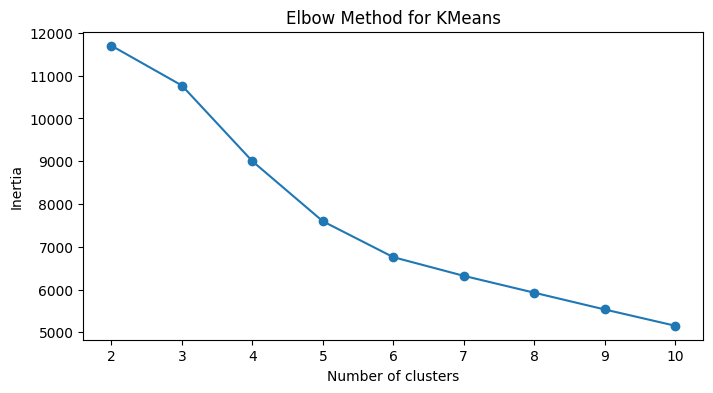

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Copy the cleaned DataFrame
df = player_stats_clean.copy()

# --- 1️⃣ Remove any repeating header rows or non-numeric rows ---
df = df[pd.to_numeric(df['Performance_Gls'], errors='coerce').notnull()]

# --- 2️⃣ Identify numeric columns for clustering ---
numeric_cols = [
    'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min', 'Playing Time_90s',
    'Performance_Gls', 'Performance_Ast', 'Performance_G+A', 'Performance_G-PK',
    'Performance_PK', 'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
    'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
    'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR',
    'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
    'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG',
    'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
    'Per 90 Minutes_npxG+xAG'
]

# Convert to numeric and fill NaNs
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# --- 3️⃣ Scale numeric data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_cols])
# --- 4️⃣ Determine optimal number of clusters (elbow method) ---
inertia = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(2,11), inertia, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for KMeans")
plt.show()



              Player Pos        Squad  Cluster
0         Max Aarons  DF  Bournemouth        1
1  Joshua Acheampong  DF      Chelsea        1
2        Tyler Adams  MF  Bournemouth        1
3   Tosin Adarabioyo  DF       Fulham        1
4     Elijah Adebayo  FW   Luton Town        0
✅ Clustering done and CSV exported!
              Player Pos        Squad  Cluster       PC1       PC2  \
0         Max Aarons  DF  Bournemouth        1 -2.010707  0.792374   
1  Joshua Acheampong  DF      Chelsea        1 -3.766366 -0.858343   
2        Tyler Adams  MF  Bournemouth        1 -3.550463 -0.818833   
3   Tosin Adarabioyo  DF       Fulham        1 -1.412781  0.874791   
4     Elijah Adebayo  FW   Luton Town        0  3.775591 -2.515835   

   Playing Time_MP  Playing Time_Starts  Playing Time_Min  Playing Time_90s  \
0               20                   13              1237              13.7   
1                1                    0                 6               0.1   
2                3      

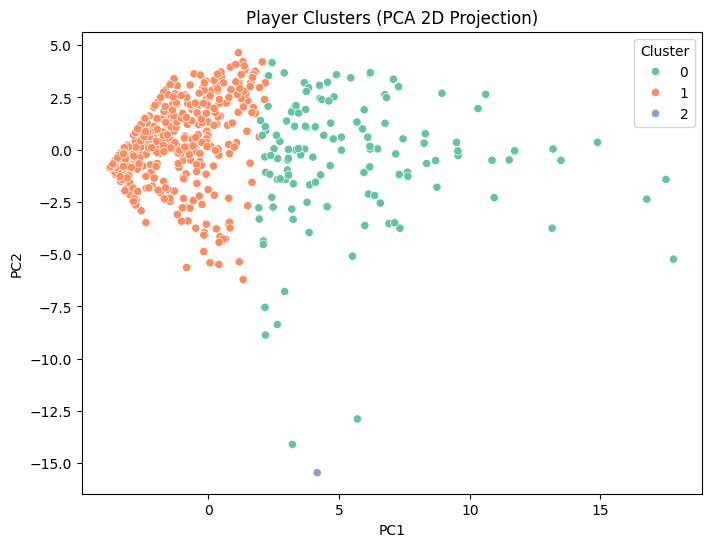

In [ ]:
k = 3  # Example, pick from elbow plot
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# --- 6️⃣ Inspect clusters ---
print(df[['Player', 'Pos', 'Squad', 'Cluster']].head())

# Optional: visualize clusters using first 2 principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PC1'] = components[:,0]
df['PC2'] = components[:,1]

export_cols = ['Player', 'Pos', 'Squad', 'Cluster', 'PC1', 'PC2'] + numeric_cols
export_df = df[export_cols].copy()
export_df.to_csv("player_stats_clustered_powerbi.csv", index=False)

print("✅ Clustering done and CSV exported!")
print(export_df.head())


plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title("Player Clusters (PCA 2D Projection)")
plt.show()
